In [ ]:
Identify a research problem of your own interest. Formulate good research questions for
meaningful data analysis and perform the following on the collected dataset

A. Exploratory data analysis based on the research questions

B. Statistical analysis on the significant features

C. Extract the features of interest based on relevant feature engineering techniques
and visualize the same statistically.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df = pd.read_csv('D:\\Downloads\\Alzheimers.csv')


In [ ]:
print(df.describe())

            Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  354.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.460452   
std      0.922843   635.485118    7.640957    2.876339    1.134005   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  371.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.342318    0.290885  1488.128686    0.729568    1.195461  
std      3.683244    0.374557   176.139286    0.037135    0.138092  
min      4.000000    0.000000  1106.000000    0.644000    0.876000  
25%     27.000000    0.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [ ]:
df.drop(['Subject ID','MRI ID','Hand'], axis=1,inplace=True)

In [ ]:
df['M/F'].replace(['M', 'F'], [0, 1], inplace=True)

In [ ]:
df.dropna(inplace=True,axis=1)

In [ ]:
df.isnull().sum()

Group       0
Visit       0
MR Delay    0
M/F         0
Age         0
EDUC        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

In [ ]:
print(df.nunique())

Group         3
Visit         5
MR Delay    201
M/F           2
Age          39
EDUC         12
CDR           4
eTIV        286
nWBV        136
ASF         265
dtype: int64


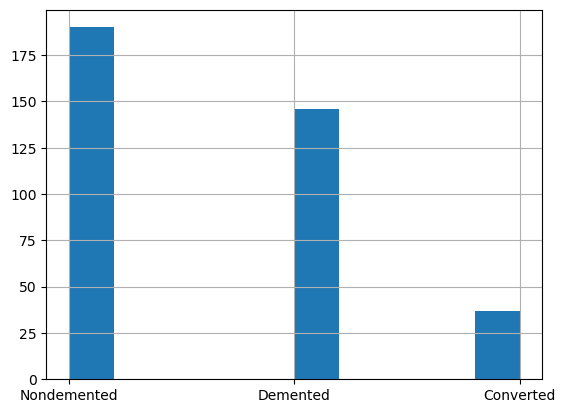

In [ ]:
df['Group'].hist()
plt.show()

In [ ]:
df['Group'].replace(['Nondemented', 'Demented','Converted'],
                        [0,1,2], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


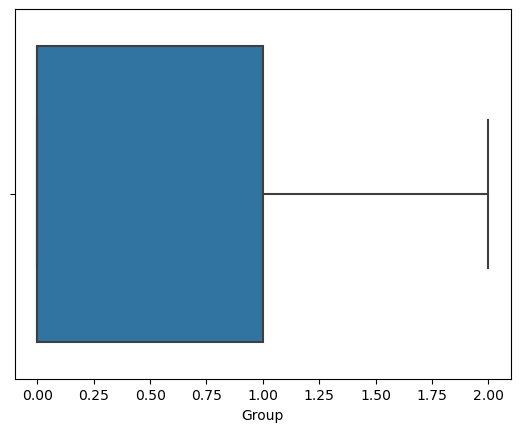

In [ ]:
sns.boxplot(df['Group'])
plt.show()

In [ ]:
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

Text(0.5, 1.0, 'Gender and Demented rate')

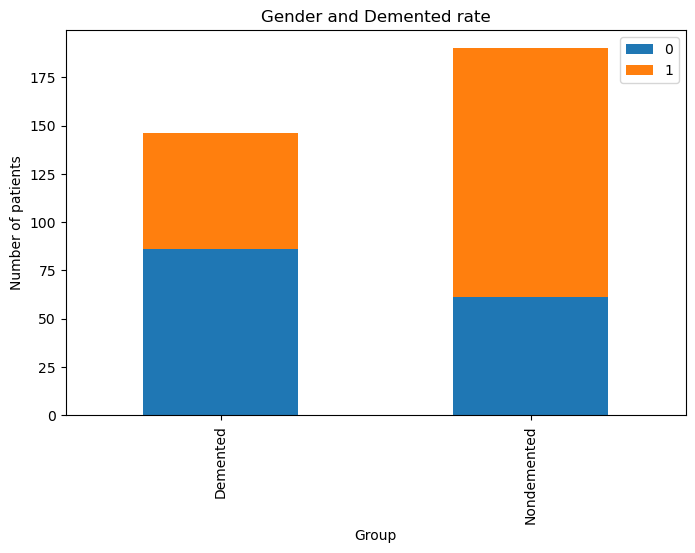

In [ ]:
sns.barplot
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

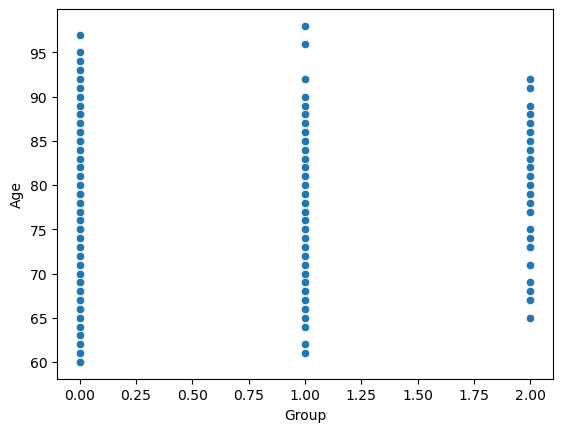

In [ ]:
sns.scatterplot(x='Group', y='Age', data=df)
plt.show()

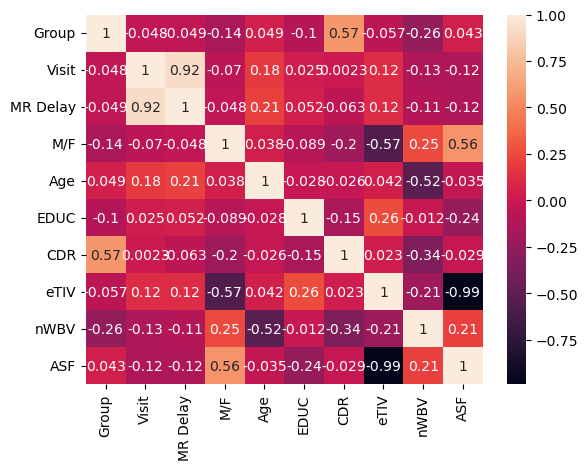

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X=df.drop(['Group'],axis=1)
y=df['Group']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     373 non-null    int64  
 1   Visit     373 non-null    int64  
 2   MR Delay  373 non-null    int64  
 3   M/F       373 non-null    int64  
 4   Age       373 non-null    int64  
 5   EDUC      373 non-null    int64  
 6   CDR       373 non-null    float64
 7   eTIV      373 non-null    int64  
 8   nWBV      373 non-null    float64
 9   ASF       373 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 29.3 KB


In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.84


In [ ]:
# Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.84
Precision: 0.7184045584045583
Recall: 0.84
F1-score: 0.7741507870753935


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# SVM (Support Vector Machine)

In [ ]:
from sklearn import svm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = svm.SVC(kernel='linear', C=1, random_state=42)

In [ ]:
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8533333333333334
Precision: 0.8377311577311577
Recall: 0.8533333333333334
F1-score: 0.8214612805035341
